In [1]:
import numpy as np 
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt 

In [2]:
df = pd.read_csv("train.csv")

In [3]:
df

,id,qid1,qid2,question1,question2,is_duplicate
0,0,1,2,What is the step by step guide to invest in sh...,What is the step by step guide to invest in sh...,0
1,1,3,4,What is the story of Kohinoor (Koh-i-Noor) Dia...,What would happen if the Indian government sto...,0
2,2,5,6,How can I increase the speed of my internet co...,How can Internet speed be increased by hacking...,0
3,3,7,8,Why am I mentally very lonely? How can I solve...,Find the remainder when [math]23^{24}[/math] i...,0
4,4,9,10,"Which one dissolve in water quikly sugar, salt...",Which fish would survive in salt water?,0
...,...,...,...,...,...,...
404285,404285,433578,379845,How many keywords are there in the Racket prog...,How many keywords are there in PERL Programmin...,0
404286,404286,18840,155606,Do you believe there is life after death?,Is it true that there is life after death?,1
404287,404287,537928,537929,What is one coin?,What's this coin?,0
404288,404288,537930,537931,What is the approx annual cost of living while...,I am having little hairfall problem but I want...,0


In [4]:
df.shape

(404290, 6)

In [5]:
df.shape

(404290, 6)

In [6]:
df.describe()

,id,qid1,qid2,is_duplicate
count,404290.000000,404290.000000,404290.000000,404290.000000
mean,202144.500000,217243.942418,220955.655337,0.369198
std,116708.614502,157751.700002,159903.182629,0.482588
min,0.000000,1.000000,2.000000,0.000000
25%,101072.250000,74437.500000,74727.000000,0.000000
50%,202144.500000,192182.000000,197052.000000,0.000000
75%,303216.750000,346573.500000,354692.500000,1.000000
max,404289.000000,537932.000000,537933.000000,1.000000


Conclusion -> Binary classification 


In [7]:
df.isnull().sum()

id              0
qid1            0
qid2            0
question1       1
question2       2
is_duplicate    0
dtype: int64

In [8]:
df=df.dropna()


In [ ]:
df = df.reset_index(drop = True)


In [9]:
df.isnull().sum()

id              0
qid1            0
qid2            0
question1       0
question2       0
is_duplicate    0
dtype: int64

In [10]:
df.duplicated().sum()

0

#### Distribution of duplicate and non-duplicate elements    -> 0 and 1

In [11]:
print(df['is_duplicate'].value_counts())

0    255024
1    149263
Name: is_duplicate, dtype: int64


In [12]:
print(df['is_duplicate'].value_counts()/df['is_duplicate'].count())    # unbalanced more non related

0    0.630799
1    0.369201
Name: is_duplicate, dtype: float64


### Number of repeated quesions

Sort According to qid

Total

In [13]:
qid_total = pd.Series(  df['qid1'].to_list()  +  df['qid2'].to_list())

In [14]:
print(qid_total.shape)

(808574,)


#### greater than once -> Duplicate

In [15]:
x= qid_total.value_counts()>1

In [16]:
print(x[x].shape)

(111778,)


## Histogram of freq of questions

<function matplotlib.pyplot.show(close=None, block=None)>

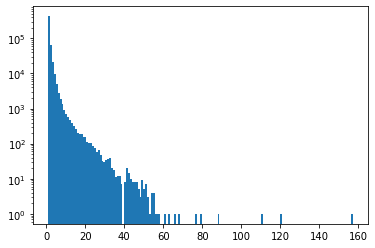

In [17]:
plt.hist(qid_total.value_counts().values, bins =160)
plt.yscale('log')
plt.show

In [18]:
ques_df =df[['question1','question2']]
ques_df.head()

,question1,question2
0,What is the step by step guide to invest in sh...,What is the step by step guide to invest in sh...
1,What is the story of Kohinoor (Koh-i-Noor) Dia...,What would happen if the Indian government sto...
2,How can I increase the speed of my internet co...,How can Internet speed be increased by hacking...
3,Why am I mentally very lonely? How can I solve...,Find the remainder when [math]23^{24}[/math] i...
4,"Which one dissolve in water quikly sugar, salt...",Which fish would survive in salt water?


In [19]:
from sklearn.feature_extraction.text import CountVectorizer

In [20]:
# Merge texts
questions = list(ques_df['question1']) + list(ques_df['question2'])
cv =CountVectorizer(max_features=3000)
q1_arr, q2_arr = np.vsplit(cv.fit_transform(questions).toarray(),2)   # transform to get bag of words 

In [21]:
temp_df1 = pd.DataFrame(q1_arr, index= ques_df. index)
temp_df2 = pd.DataFrame(q2_arr, index= ques_df.index)
temp_df = pd. concat ([temp_df1, temp_df2], axis=1)
temp_df.shape

(404287, 6000)

In [22]:
# Sparse array

In [23]:
temp_df

,0,1,2,3,4,5,6,7,8,9,...,2990,2991,2992,2993,2994,2995,2996,2997,2998,2999
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
404285,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
404286,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
404287,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
404288,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [24]:
temp_df['is_Duplicate']=df['is_duplicate']

In [25]:
temp_df.head()

,0,1,2,3,4,5,6,7,8,9,...,2991,2992,2993,2994,2995,2996,2997,2998,2999,is_Duplicate
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# Model Training wothout preprocessing and feature eng

In [26]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(temp_df.iloc[:,0:-1].values,temp_df.iloc[:,-1].values,test_size=0.2,random_state=1)


In [27]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [28]:
rf = RandomForestClassifier()

In [29]:
rf.fit(x_train,y_train)

RandomForestClassifier()

In [30]:
y_pred = rf.predict(x_test)

In [31]:
accuracy_score(y_test,y_pred)






0.809987879987138

### From XgBoast 

In [32]:
from xgboost import XGBClassifier
xgb = XGBClassifier()
xgb.fit(x_train,y_train)
y_pred = xgb.predict(x_test)
accuracy_score(y_test, y_pred)

0.747359568626481

In [33]:

    q1_tbow= cv.transform([q1]).toarray()
    q2_tbow = cv.transform([q2]).toarray()


NameError: name 'q1' is not defined

In [ ]:
t_df1 = pd.DataFrame(q1_tbow)
t_df2 = pd.DataFrame(q2_tbow)
t_df = pd.concat ([t_df1, t_df2], axis=1)
t_df.shape

(1, 6000)

In [ ]:
q1_tbow

array([[0, 0, 0, ..., 0, 0, 0]])

In [ ]:
q1 = 'How do I post a trending post on Quora?'
q2= 'How do I post in Quora?'

In [ ]:
print(rf.predict(t_df))

[0]


/Users/harshitsingh/opt/anaconda3/envs/nlp_course/lib/python3.7/site-packages/sklearn/ensemble/base.py:158: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  dtype=np.int)
/Users/harshitsingh/opt/anaconda3/envs/nlp_course/lib/python3.7/site-packages/sklearn/utils/fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
